In [2]:
#                                     Detail
# 1. age
# 2. sex
# 3. chest pain type (4 values) 0: Typical Angina, 1:Atypical Angina, 2:Non-anginal Pain, 3:Asymptomatic
# 4. resting blood pressure
# 5. serum cholestoral in mg/dl
# 6. fasting blood sugar > 120 mg/dl
# 7. resting electrocardiographic results (values 0,1,2)
# 8. maximum heart rate achieved
# 9. exercise induced angina
# 10. oldpeak = ST depression induced by exercise relative to rest
# 11. the slope of the peak exercise ST segment
# 12. number of major vessels (0-3) colored by flourosopy
# 13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### 1. Import Libraries and Dataset


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Data_Heart Disease.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


### 2. Display Top 5 Rows of the Dataset


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 3. Check The Last 5 Rows of the Dataset


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### 4. Find Shape of the Dataset 


In [6]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 1025
Columns: 14


### 5. Acquire Information of the Dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 6. Check Null Values in the Dataset


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 7. Check for Duplicate Data and Drop Them


In [9]:
df.duplicated().sum()

723

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

### 8. Acquire Overall Statistics of the Dataset


In [12]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 9. Draw Correlation Matrix 


<AxesSubplot: >

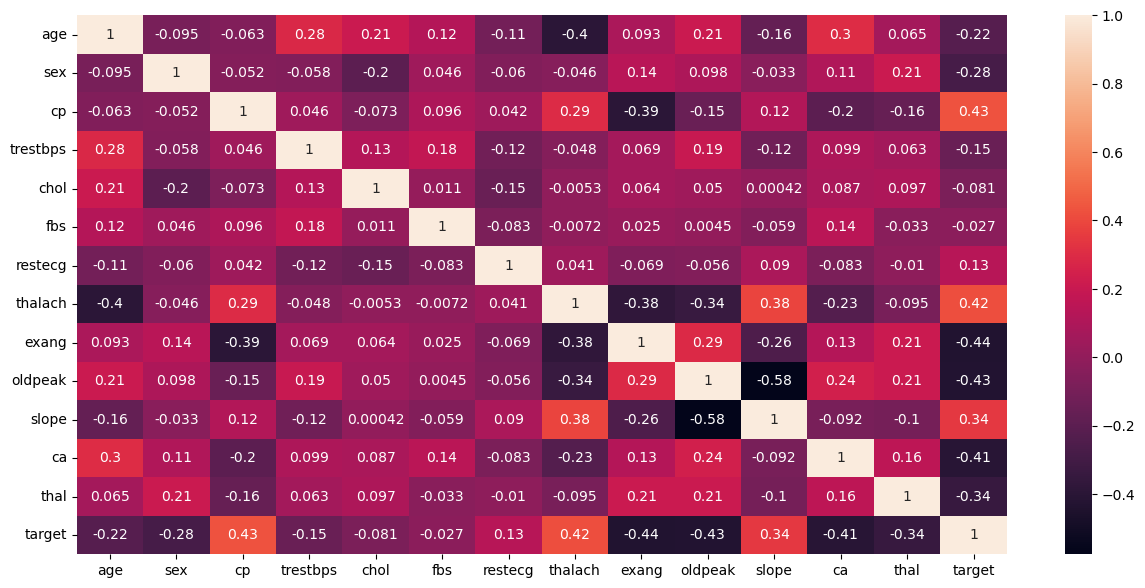

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 10. Find the Number of People That Have Heart Disease and the Number of People That Don't Have Heart Disease


In [14]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Count')

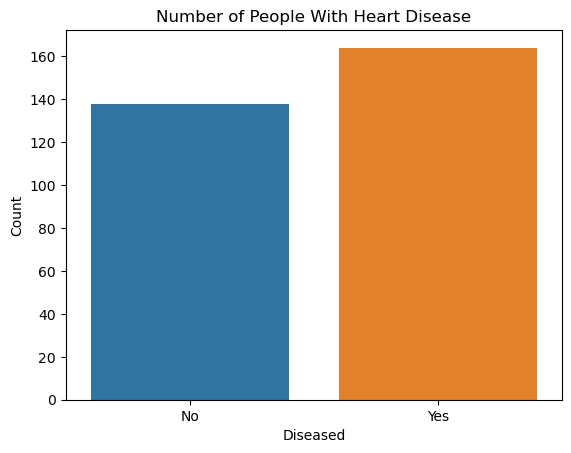

In [15]:
sns.countplot(x='target', data=df)
plt.title('Number of People With Heart Disease')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Diseased')
plt.ylabel('Count')
plt.show()

### 11. Find the Count of Male and Female


Text(0, 0.5, 'Count')

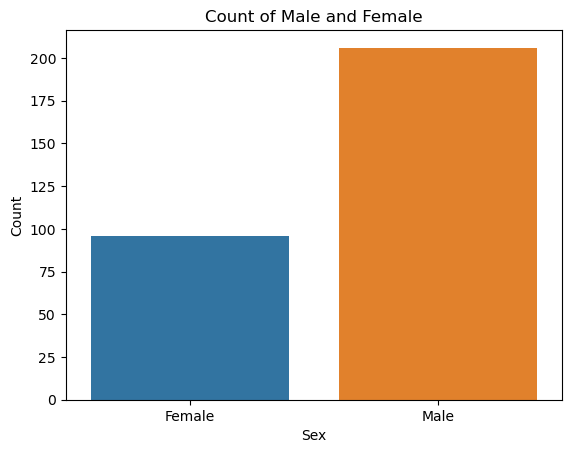

In [ ]:
sns.countplot(x='sex', data=df)
plt.title('Count of Male and Female')
plt.xticks([0,1],['Female','Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### 12. Who Has Higher Heart Disease Count? Male or Female?

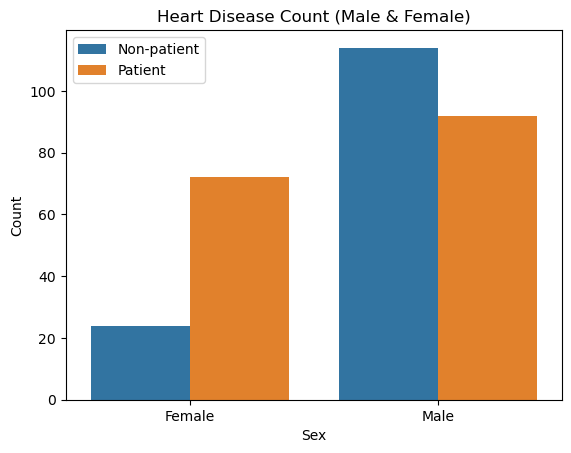

In [20]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Count (Male & Female)')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Non-patient', 'Patient'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### 13. Check Age Distribution


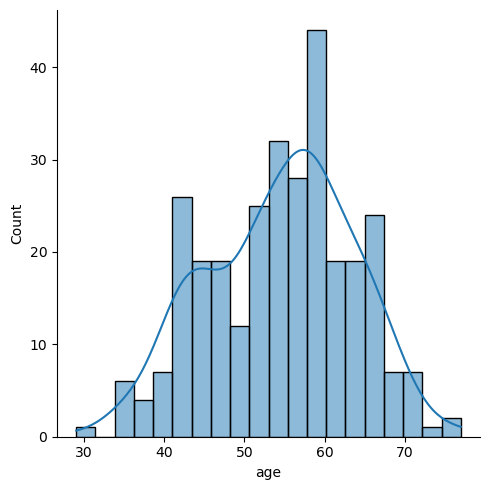

In [17]:
sns.displot(df['age'], bins=20, kde=True)
plt.show()

### 14. Check Chest Pain Type


Text(0, 0.5, 'Count')

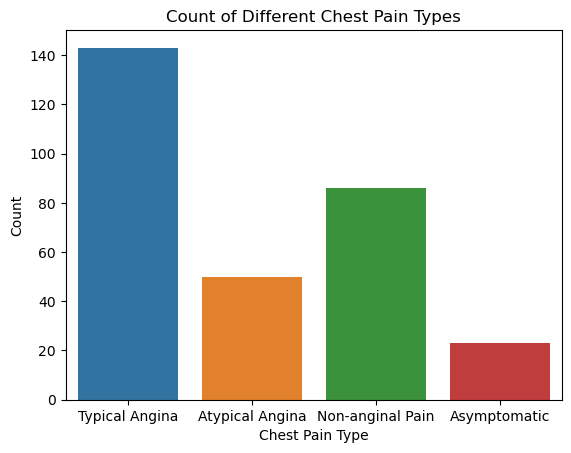

In [ ]:
#0: Typical Angina, 1:Atypical Angina, 2:Non-anginal Pain, 3:Asymptomatic
sns.countplot(x='cp', data=df)
plt.title('Count of Different Chest Pain Types')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### 15. Chest Pain Distribution for Patients and Non-patients


Text(0, 0.5, 'Count')

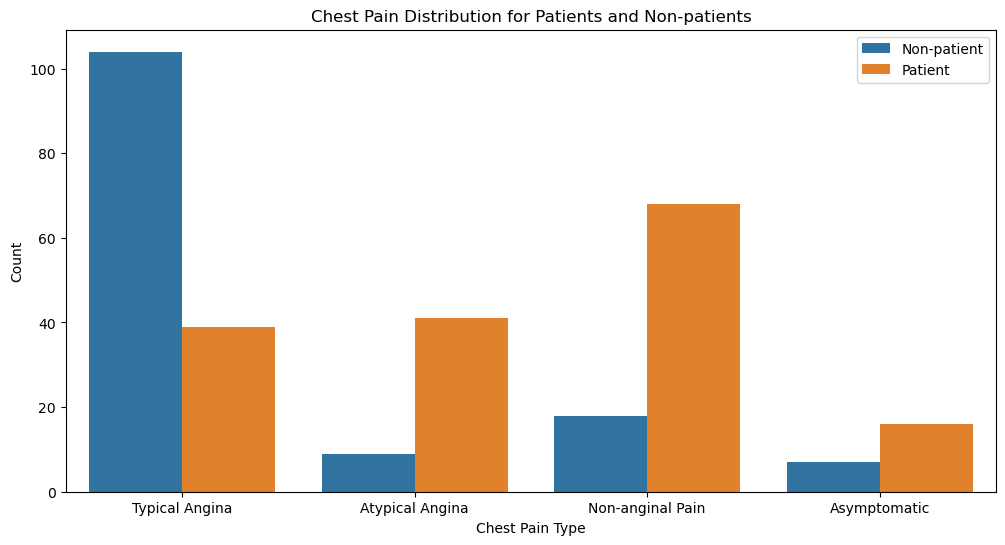

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Distribution for Patients and Non-patients')
plt.legend(labels=['Non-patient','Patient'])
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### 16. Fasting Blood Sugar Distribution for Patients and Non-patients


Text(0, 0.5, 'Count')

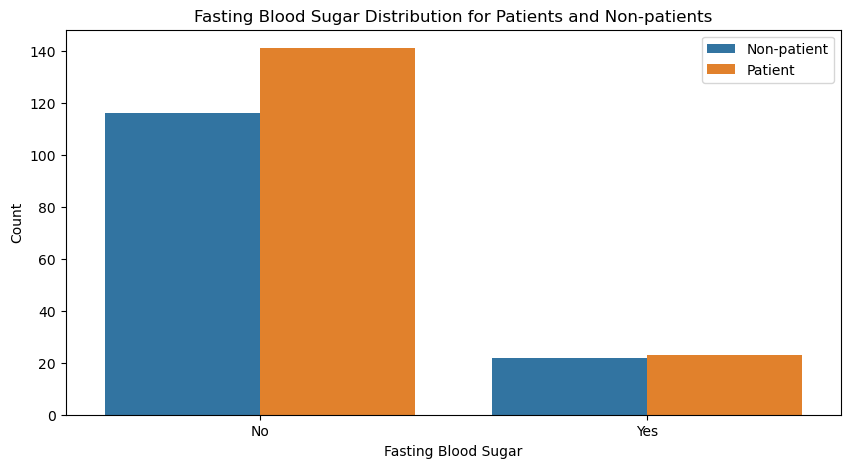

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting Blood Sugar Distribution for Patients and Non-patients')
plt.legend(labels=['Non-patient','Patient'])
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

### 17. Check Resting Blood Pressure Distribution


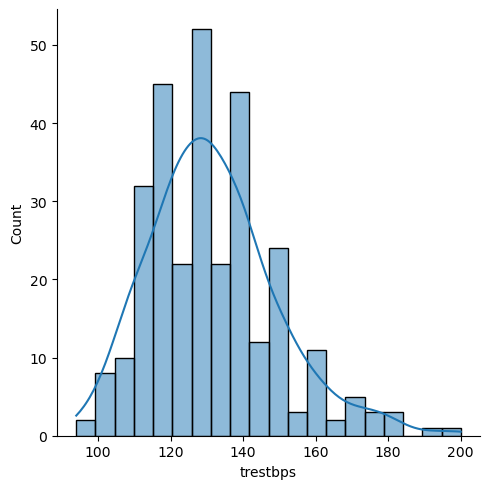

In [19]:
sns.displot(x='trestbps', data=df, bins=20, kde=True)
plt.show()

### 18. Compare Resting Blood Pressure by Sex

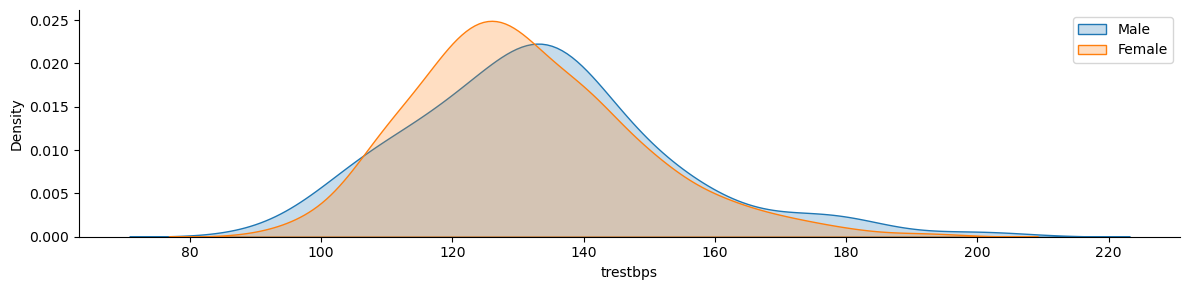

In [ ]:
g = sns.FacetGrid(df, hue='sex', aspect=4)
g.map(sns.kdeplot, 'trestbps', fill=True)
plt.legend(['Male','Female'])
plt.show()

### 19. Show Distribution of Serum Cholesterol

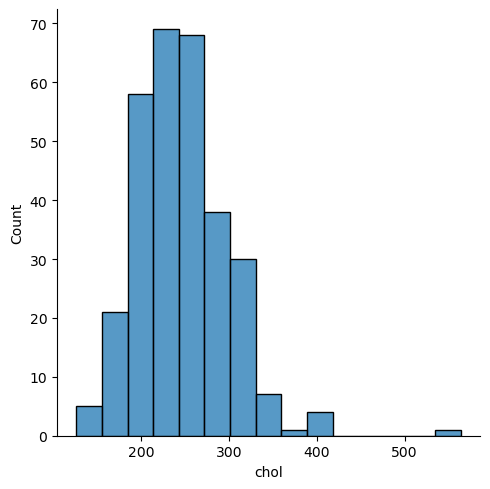

In [ ]:
sns.displot(x='chol', data=df, bins=15)
plt.show()